# Physical Object Representations

## Primitive-Based

* build up an object by primities, such as lines, points, etc...
* convex shapes can be made using linear primitives (lines / halfspaces)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150
plt.rcParams["text.usetex"] = True

Text(0.5,1,'Obstacles defined by points.')

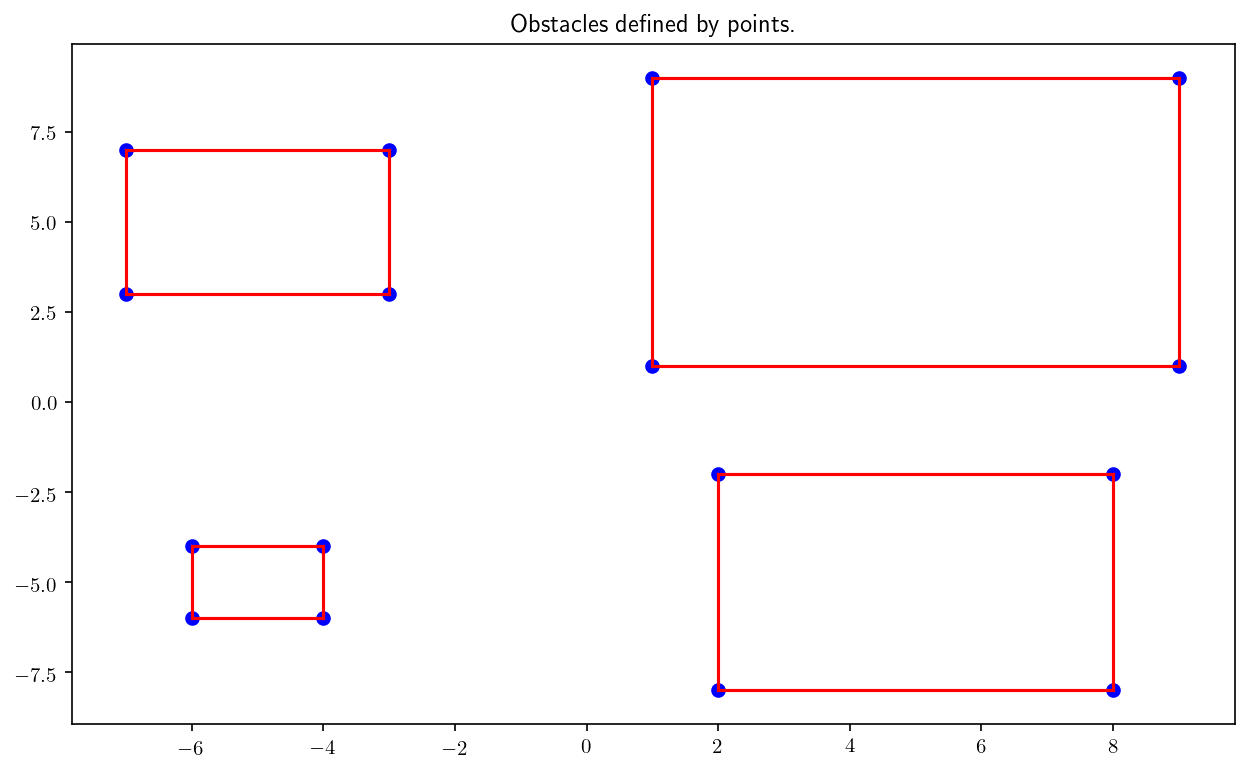

In [59]:
points = np.array([(-1, -1), (-1, 1), (1, 1), (1, -1)])

scale = lambda A, c: A * c
translate = lambda A, x, y: A + np.array([(x, y)]*4)


objects = [
    translate(scale(points, c), 5 * x, 5 * y)
    for c, (x, y) in zip(range(1, 5), itertools.product([-1, 1], repeat=2))
]

for points in objects:
    for pt in range(4):
        x1, y1 = points[pt]
        x2, y2 = points[(pt + 1) % 4]
        plt.plot([x1, x2], [y1, y2], c="red")
        plt.scatter([x1], [y1], c="blue")
    
plt.title("Obstacles defined by points.")

Text(0.5,1,'Obstacle defined by lines')

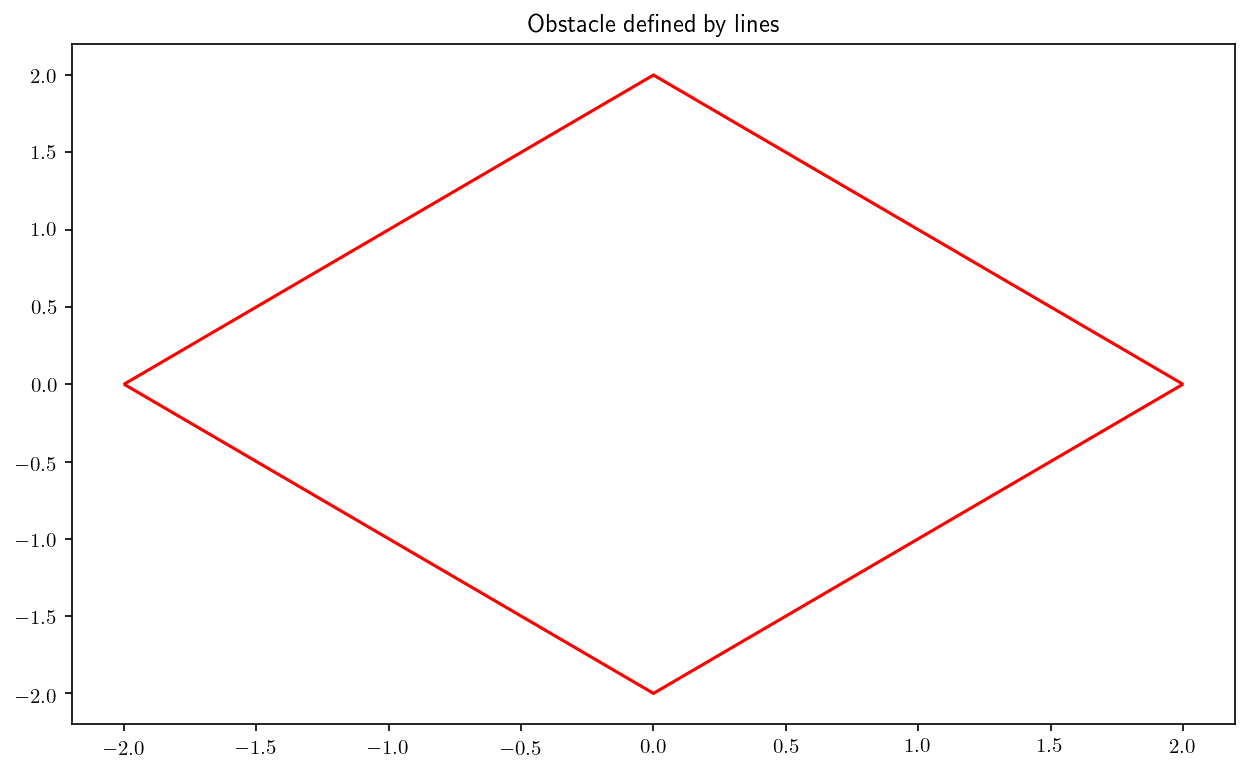

In [80]:
makeline = lambda a, b, c: lambda x: -(a / b) * x + c

objects = [
    makeline(1, 1, -2),
    makeline(1, -1, -2),
    makeline(1, 1, 2),
    makeline(1, -1, 2),
]

for line in objects:
    x = np.linspace(-2, 2, 1000) 
    y = line(x)
    valid = np.logical_and.reduce([x > -2, x < 2, y > -2, y < 2])
    plt.plot(x[valid], y[valid], c="red")
    
    
plt.title("Obstacle defined by lines")

### Convexity

A set $S$ is convex if for every $x, y \in S$, there exists 
a point $\lambda x + (1 - \lambda) y \in S$.  In other words, you 
must be able to move between two points without leaving $S$.

### Algebraic Sets

A generalization of polygons / polyhedra, uses nonlinear primitives, e.g.
circles, elipses, hyperbola, parabola, etc...

### Semi-Algebraic Sets

A set defined by the finite intersection / union of several algebraic sets.

## Polygon Soups

3D surfaces created by joining together several polygons.

## Sensor-Based 

Sensors are error-prone, and do not have a global view of the world.  From
sensor data we'll capture depth data / pixel data, and construct a point cloud
from the data we've collected.  From there, we attempt to construct some sort
of discrete grid that identifies free cells and obstacle cells.

# Rigid Body Transformations

Defined by:
* each point in the body remains the same distance from each other
* points retain relative placement

A rigid body in 2D can be described simply the position / rotation w.r.t. 
a coordinate system.  Two types of transformations possible:
* rotation
* translation

## Rigid Body Rotations (2D)

We view this simply as a rotation matrix applied to a vector in
$\mathbb{R}^2$.  For example, a rotation of $\theta$ would be

$$
R(\theta) = 
\left[
    \begin{matrix} 
        cos(\theta) & -sin(\theta) \\
        sin(\theta) & cos(\theta) 
    \end{matrix}
\right]
$$

## General Rigid Body Motions (2D)

One way to represent rotations and transformation:
$$
\vec{u} = R(\theta)\vec{v} + \vec{t}
$$

Alternatively, we can use homogenous transformations for convenience like so:  
$$
\left[
    \begin{matrix} 
        R(\theta) & \vec{t} \\
        0 & 1 
    \end{matrix}
\right]
\left[
    \begin{matrix} 
        \vec{v} \\
        1 
    \end{matrix}
\right]
$$

### Properties of Rotation Matrices

Columns are mutually orthonormal, i.e. 
$$
r_i^Tr_j = \begin{cases} 1 & i = j \\ 0 & i \ne j \end{cases}
$$

$$
R^TR = RR^T = I
$$